# Example if call LibRadTran from the notebook
=======================================================================

- Sylvie Dagoret-Campagne
- update 31 May 2019



Simple test to call on-line libradtran to check if it is working

In [9]:
%load_ext autoreload
%autoreload 2

/Users/dagoret/MacOSX/External/libRadtran/libRadtran-2.0.1/
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
import sys
import os

In [11]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx

In [12]:
from scipy.interpolate import interp1d

In [13]:
from librtsimana import *
#from libsimulateTranspCTIOScattAbsAer3 import *
#from libsimulateTranspPDMScattAbsAer3 import *
from libsimulateTranspOHPScattAbsAer3 import *

In [14]:
os.getenv('LIBRADTRANDIR')

'/Users/dagoret/MacOSX/External/libRadtran/libRadtran-2.0.1'

In [15]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
airmasses=np.linspace(1.,2.,20.)
pressure = 712
pwv=4.0
aer=0
ozone=300.

/Users/dagoret/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """Entry point for launching an IPython kernel.


In [17]:
NBOBS=len(airmasses)

In [18]:
jet = plt.get_cmap('jet')
cNorm = colors.Normalize(vmin=0, vmax=NBOBS)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
all_colors = scalarMap.to_rgba(np.arange( NBOBS), alpha=1)

In [19]:
all_transmission=np.zeros((NBWL,NBOBS))

In [20]:
idx=0
for am in airmasses:
    path,thefile=ProcessSimulation(am,pwv,ozone,pressure,prof_str='us',proc_str='sa')
    data = np.loadtxt(os.path.join(path,thefile))
    wl = data[:,0]
    atm = data[:,1]  
    func=interp1d(wl,atm,kind='linear') 
    transm=func(WL)
    all_transmission[:,idx]=transm
    idx+=1

--------------------------------------------
 1) airmass =  1.0
 2) pwv =  4.0
 3) oz =  300.0
 4) pressure  =  712
 5) atmospheric profile =  us
 6) interaction processes =  sa
--------------------------------------------
Running uvspec with input file:  simulations/RT/2.0.1/PDM/pp/us/sa/rt/in/RT_PDM_pp_us_sa_rt_z10_wv40_oz30.INP
Output to file                :  simulations/RT/2.0.1/PDM/pp/us/sa/rt/out/RT_PDM_pp_us_sa_rt_z10_wv40_oz30.OUT
uvspec cmd:  /Users/dagoret/MacOSX/External/libRadtran/libRadtran-2.0.1/bin/uvspec  < simulations/RT/2.0.1/PDM/pp/us/sa/rt/in/RT_PDM_pp_us_sa_rt_z10_wv40_oz30.INP > simulations/RT/2.0.1/PDM/pp/us/sa/rt/out/RT_PDM_pp_us_sa_rt_z10_wv40_oz30.OUT
--------------------------------------------
 1) airmass =  1.0526315789473684
 2) pwv =  4.0
 3) oz =  300.0
 4) pressure  =  712
 5) atmospheric profile =  us
 6) interaction processes =  sa
--------------------------------------------
Running uvspec with input file:  simulations/RT/2.0.1/PDM/pp/us/sa/rt/in/RT

--------------------------------------------
 1) airmass =  1.631578947368421
 2) pwv =  4.0
 3) oz =  300.0
 4) pressure  =  712
 5) atmospheric profile =  us
 6) interaction processes =  sa
--------------------------------------------
Running uvspec with input file:  simulations/RT/2.0.1/PDM/pp/us/sa/rt/in/RT_PDM_pp_us_sa_rt_z16_wv40_oz30.INP
Output to file                :  simulations/RT/2.0.1/PDM/pp/us/sa/rt/out/RT_PDM_pp_us_sa_rt_z16_wv40_oz30.OUT
uvspec cmd:  /Users/dagoret/MacOSX/External/libRadtran/libRadtran-2.0.1/bin/uvspec  < simulations/RT/2.0.1/PDM/pp/us/sa/rt/in/RT_PDM_pp_us_sa_rt_z16_wv40_oz30.INP > simulations/RT/2.0.1/PDM/pp/us/sa/rt/out/RT_PDM_pp_us_sa_rt_z16_wv40_oz30.OUT
--------------------------------------------
 1) airmass =  1.6842105263157894
 2) pwv =  4.0
 3) oz =  300.0
 4) pressure  =  712
 5) atmospheric profile =  us
 6) interaction processes =  sa
--------------------------------------------
Running uvspec with input file:  simulations/RT/2.0.1/PDM/pp/

In [21]:
ls simulation/

ls: simulation/: No such file or directory


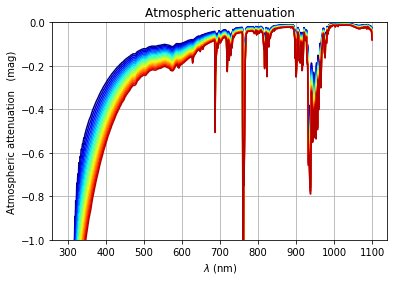

In [22]:
idx=0
for am in airmasses:
    colorVal = scalarMap.to_rgba(idx, alpha=1)
    plt.plot(WL,2.5*np.log10(all_transmission[:,idx]),color=colorVal)
    idx+=1
plt.xlabel("$\lambda$ (nm)")
plt.ylabel("Atmospheric attenuation   (mag)")
plt.title("Atmospheric attenuation")
plt.ylim(-1.,0.)
plt.grid()

In [23]:
assert False

AssertionError: 

In [24]:
thetitle='Atmospheric attenuation 400-600 nm'

In [25]:
x1,y1,err1=FitAttenuationSmoothBin(airmasses,all_transmission,thetitle,ZMIN=400.,ZMAX=600.,Wwidth=11,Bwidth=10,Mag=True)

TypeError: slice indices must be integers or None or have an __index__ method

In [ ]:
thetitle='Atmospheric attenuation 600-1000 nm'

In [ ]:
x2,y2,err2=FitAttenuationSmoothBin(airmasses,all_transmission,thetitle,ZMIN=600.,ZMAX=1000.,Wwidth=11,Bwidth=10,Mag=True)

In [ ]:
wl=np.concatenate((x1,x2))
y=np.concatenate((y1,y2))
err=np.zeros(len(y))

In [ ]:
PlotOpticalThroughput(wl,y,err,"reconstructed TOA")

## Save simulation

In [ ]:
np.savetxt('transmission.txt',all_transmission)